本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


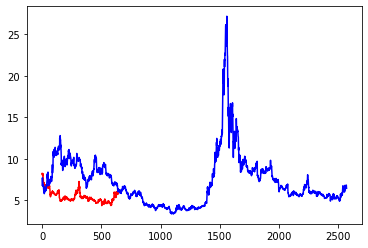

(641, 6)
(2569, 7)
             open  close   high    low    volume    code
date                                                    
2017-11-02  8.497  8.212  8.526  8.183  910038.0  601727
2017-11-03  8.232  8.104  8.281  8.006  534550.0  601727
2017-11-06  8.133  8.183  8.192  8.006  364331.0  601727
2017-11-07  8.163  8.104  8.232  8.035  522623.0  601727
2017-11-08  8.084  7.957  8.084  7.868  509066.0  601727
            open  high   low  close       volume  outstanding_share  turnover
date                                                                         
2008-12-05  6.00  7.66  5.68   6.80  314993600.0        616038405.0  0.511321
2008-12-08  6.71  7.48  6.70   7.48  159923712.0        616038405.0  0.259600
2008-12-09  7.78  8.12  7.41   7.69  246571008.0        616038405.0  0.400253
2008-12-10  7.49  7.67  7.31   7.54  118765240.0        616038405.0  0.192789
2008-12-11  7.52  7.56  6.93   7.12  136933184.0        616038405.0  0.222280


In [1]:
import pandas as pd 
import akshare as ak 
import tushare as ts
import matplotlib.pyplot as plt 
import numpy as np 

import dsw

df_1 = ts.get_k_data('601727')
df_1.set_index(['date'], inplace = True)

df_2 = ak.stock_zh_a_daily("sh601727", adjust="hfq")
plt.plot(df_1['close'].values, 'r')
plt.plot(df_2['close'].values, 'b')
plt.show()
print(np.shape(df_1))
print(np.shape(df_2))
print(df_1.head())
print(df_2.head())


### 我们可以看到，akshare的接口查询到的数据比tushare接口因子更多，样本量也更大，所以我选择akshare接口来训练我们的模型

In [2]:
df = df_2
# df.to_csv('data/init_data.csv')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


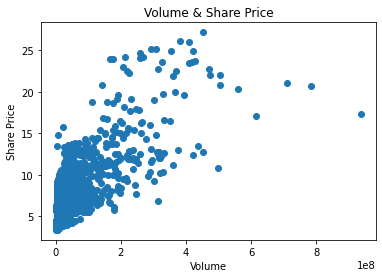

In [3]:
plt.scatter(df['volume'], df['close'])
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()


### 可以看出成交量和股价都分布在较低的水平，呈现一定的正相关趋势

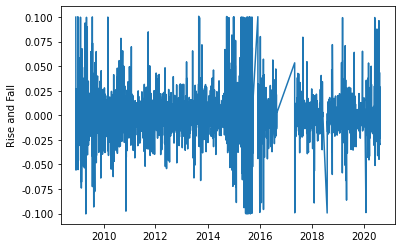

In [4]:
daily_return = df['close'].pct_change().dropna()
plt.plot(daily_return)
plt.ylabel('Rise and Fall')
plt.show()


,open,high,low,close,volume,outstanding_share,turnover,r_1,r_5,r_10
date,,,,,,,,,,
2020-08-14,6.673897,6.685151,6.415044,6.606370,73853539.0,1.089068e+10,0.006781,-0.015101,0.037102,0.067273
2020-08-17,6.617624,6.730169,6.550098,6.628879,64636615.0,1.089068e+10,0.005935,0.003407,0.026132,-0.023217
2020-08-18,6.651388,6.910240,6.606370,6.820205,111883880.0,1.089068e+10,0.010273,0.028862,0.011686,0.052083
2020-08-19,6.820205,6.820205,6.583861,6.617624,80745890.0,1.089068e+10,0.007414,-0.029703,0.005128,-0.001698
2020-08-20,6.550098,6.595115,6.426298,6.426298,63324597.0,1.089068e+10,0.005815,-0.028912,-0.041946,0.005282


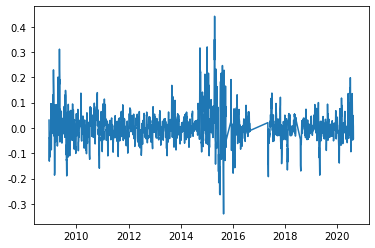

In [5]:
#1 5 10 日均收益
df['r_1'] = (df['close'] - df.shift(1)['close']) / df.shift(1)['close']
df['r_5'] = (df['close'] - df.shift(5)['close']) / df.shift(5)['close']
df['r_10'] = (df['close'] - df.shift(10)['close']) / df.shift(10)['close']

plt.plot(df['r_5'])
df.tail()


### 均线没有异常波动
### 发现akshare的接口查询到的数据在16年底有一定空缺，但是ts接口也无法补足

,open,high,low,close,volume,outstanding_share,turnover,r_1,r_5,r_10,rsi_5,rsi_14
date,,,,,,,,,,,,
2020-08-14,6.673897,6.685151,6.415044,6.606370,73853539.0,1.089068e+10,0.006781,-0.015101,0.037102,0.067273,54.964768,56.922085
2020-08-17,6.617624,6.730169,6.550098,6.628879,64636615.0,1.089068e+10,0.005935,0.003407,0.026132,-0.023217,56.573850,57.411036
2020-08-18,6.651388,6.910240,6.606370,6.820205,111883880.0,1.089068e+10,0.010273,0.028862,0.011686,0.052083,68.523219,61.419536
2020-08-19,6.820205,6.820205,6.583861,6.617624,80745890.0,1.089068e+10,0.007414,-0.029703,0.005128,-0.001698,50.229991,55.466681
2020-08-20,6.550098,6.595115,6.426298,6.426298,63324597.0,1.089068e+10,0.005815,-0.028912,-0.041946,0.005282,38.192898,50.489526


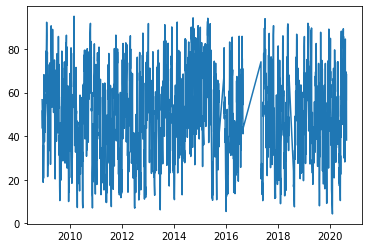

In [6]:
#5 14日rsi
df['rsi_5'] = dsw.RSI(df['close'], 5)
df['rsi_14'] = dsw.RSI(df['close'], 14)
plt.plot(df['rsi_5'])
df.tail()


### rsi没有异常波动

In [7]:
df['K'], df['D'], df['J'] = dsw.KDJ(df)
df.tail()


,open,high,low,close,volume,outstanding_share,turnover,r_1,r_5,r_10,rsi_5,rsi_14,K,D,J
date,,,,,,,,,,,,,,,
2020-08-14,6.673897,6.685151,6.415044,6.606370,73853539.0,1.089068e+10,0.006781,-0.015101,0.037102,0.067273,54.964768,56.922085,56.237245,58.906054,50.899628
2020-08-17,6.617624,6.730169,6.550098,6.628879,64636615.0,1.089068e+10,0.005935,0.003407,0.026132,-0.023217,56.573850,57.411036,54.399709,57.403939,48.391250
2020-08-18,6.651388,6.910240,6.606370,6.820205,111883880.0,1.089068e+10,0.010273,0.028862,0.011686,0.052083,68.523219,61.419536,61.387246,58.731708,66.698322
2020-08-19,6.820205,6.820205,6.583861,6.617624,80745890.0,1.089068e+10,0.007414,-0.029703,0.005128,-0.001698,50.229991,55.466681,57.349951,58.271122,55.507609
2020-08-20,6.550098,6.595115,6.426298,6.426298,63324597.0,1.089068e+10,0.005815,-0.028912,-0.041946,0.005282,38.192898,50.489526,42.677745,53.073330,21.886576


### KDJ没有异常波动

In [8]:
# df.to_csv('data/factor_data.csv')
df.tail()


,open,high,low,close,volume,outstanding_share,turnover,r_1,r_5,r_10,rsi_5,rsi_14,K,D,J
date,,,,,,,,,,,,,,,
2020-08-14,6.673897,6.685151,6.415044,6.606370,73853539.0,1.089068e+10,0.006781,-0.015101,0.037102,0.067273,54.964768,56.922085,56.237245,58.906054,50.899628
2020-08-17,6.617624,6.730169,6.550098,6.628879,64636615.0,1.089068e+10,0.005935,0.003407,0.026132,-0.023217,56.573850,57.411036,54.399709,57.403939,48.391250
2020-08-18,6.651388,6.910240,6.606370,6.820205,111883880.0,1.089068e+10,0.010273,0.028862,0.011686,0.052083,68.523219,61.419536,61.387246,58.731708,66.698322
2020-08-19,6.820205,6.820205,6.583861,6.617624,80745890.0,1.089068e+10,0.007414,-0.029703,0.005128,-0.001698,50.229991,55.466681,57.349951,58.271122,55.507609
2020-08-20,6.550098,6.595115,6.426298,6.426298,63324597.0,1.089068e+10,0.005815,-0.028912,-0.041946,0.005282,38.192898,50.489526,42.677745,53.073330,21.886576


In [9]:
df = pd.read_csv('data/factor_data.csv')
df.set_index('date', inplace = True)
df.tail()

df_mean = df.mean(axis = 0)
df_std = df.std(axis = 0)

df_1 = (df - df_mean) / df_std  #归一化之后的df--df_1
df_1.tail()


,open,high,low,close,volume,outstanding_share,turnover,r_1,r_5,r_10,rsi_5,rsi_14,K,D,J
date,,,,,,,,,,,,,,,
2020-08-14,-0.193283,-0.224091,-0.242593,-0.215419,0.539844,0.86181,-0.145953,-0.588152,0.590779,0.734376,0.299564,0.653632,0.392277,0.580135,0.100807
2020-08-17,-0.211037,-0.210428,-0.198136,-0.208310,0.407186,0.86181,-0.175012,0.117722,0.408285,-0.306793,0.381201,0.693837,0.310225,0.504035,0.027573
2020-08-18,-0.200385,-0.155777,-0.179613,-0.147880,1.087211,0.86181,-0.026049,1.088568,0.167964,0.559608,0.987454,1.023444,0.622240,0.571303,0.562058
2020-08-19,-0.147125,-0.183103,-0.187022,-0.211864,0.639045,0.86181,-0.124222,-1.145072,0.058869,-0.059193,0.059344,0.533959,0.441963,0.547968,0.235339
2020-08-20,-0.232340,-0.251416,-0.238888,-0.272294,0.388302,0.86181,-0.179149,-1.114888,-0.724242,0.021113,-0.551360,0.124703,-0.213196,0.284638,-0.746244


### 发现‘outstanding share’列存在巨大的数量级差异，会干扰模型的训练，故删除之

In [10]:
df_1.drop('outstanding_share', axis = 1, inplace = True)
# df_1.to_csv('data/one_data.csv')
df_1.tail()


,open,high,low,close,volume,turnover,r_1,r_5,r_10,rsi_5,rsi_14,K,D,J
date,,,,,,,,,,,,,,
2020-08-14,-0.193283,-0.224091,-0.242593,-0.215419,0.539844,-0.145953,-0.588152,0.590779,0.734376,0.299564,0.653632,0.392277,0.580135,0.100807
2020-08-17,-0.211037,-0.210428,-0.198136,-0.208310,0.407186,-0.175012,0.117722,0.408285,-0.306793,0.381201,0.693837,0.310225,0.504035,0.027573
2020-08-18,-0.200385,-0.155777,-0.179613,-0.147880,1.087211,-0.026049,1.088568,0.167964,0.559608,0.987454,1.023444,0.622240,0.571303,0.562058
2020-08-19,-0.147125,-0.183103,-0.187022,-0.211864,0.639045,-0.124222,-1.145072,0.058869,-0.059193,0.059344,0.533959,0.441963,0.547968,0.235339
2020-08-20,-0.232340,-0.251416,-0.238888,-0.272294,0.388302,-0.179149,-1.114888,-0.724242,0.021113,-0.551360,0.124703,-0.213196,0.284638,-0.746244


(1494, 5, 14)
(517, 5, 14)
(490, 5, 14)
Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

120/120 [==============================] - 1s 6ms/step - loss: 4.7188 - val_loss: 6.6755
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 1.9471 - val_loss: 4.3586
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.9688 - val_loss: 2.9548
Epoch 4/100
120/120 [==============================] - 1s 4ms/step - loss: 0.7136 - val_loss: 2.5700
Epoch 5/100
120/120 [==============================] - 1s 4ms/st

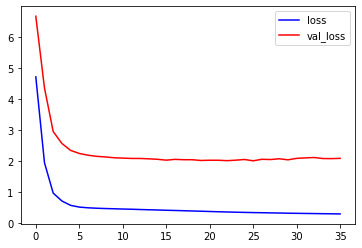

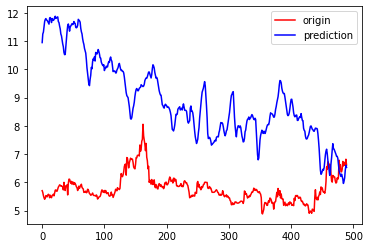

In [11]:
import tensorflow as tf 
from tensorflow.keras import layers

df = pd.read_csv('data/one_data.csv')
df.set_index('date', inplace = True)
LEN_TEST = 496   #18.6
df = df.iloc[50:-LEN_TEST]  #数据前50不稳定

df_1 = pd.read_csv('data/factor_data.csv')
df_1.set_index('date', inplace = True)
data_test = df_1.iloc[-LEN_TEST:]
df_1 = df_1.values
target = df_1[:, 3]

LEN_TRAIN = 1500
df_train = df.iloc[:LEN_TRAIN]
target_train = target[:LEN_TRAIN]

df_val = df.iloc[LEN_TRAIN:]
target_val = target[LEN_TRAIN:]

df_test = df.iloc[-LEN_TEST:]
target_test = target[-LEN_TEST:]


#++++++++++++++++++++++++++++++++++++++++++++
X_train, y_train = dsw.window_data(df_train.values, target_train, 5)
X_val, y_val = dsw.window_data(df_val.values, target_val, 5)
X_test, y_test = dsw.window_data(df_test.values, target_test, 5)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

#+++++++++++++++++++++++++++++++++++++++++++++
EPOCHS = 100
STEP_PER_EPOCH = 120

BATCH_SIZE = 100
BUFFER_SIZE = 2000

X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_val = X_val.astype('float64')
y_val = y_val.astype('float64')
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data = val_data.cache().batch(BATCH_SIZE).repeat()

regressor = tf.keras.Sequential()
regressor.add(layers.LSTM(units = 30, activation = 'sigmoid'))
# regressor.add(layers.LSTM(units = 10, activation = 'tanh', input_shape = (5, 14)))
regressor.add(layers.Dense(units = 1))

# regressor.compile(optimizer = tf.keras.optimizers.RMSprop(clipvalue = 1.0), loss = 'mae')
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer = 'adam', loss = 'mae')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, mode='auto', restore_best_weights=True)
history = regressor.fit(train_data, epochs = EPOCHS, steps_per_epoch = STEP_PER_EPOCH, validation_steps = 50, validation_data = val_data, callbacks=[early_stopping])

dsw.loss_plot(history)

result = regressor.predict(X_test).reshape(-1, 1)
plt.plot(y_test, 'r', label = 'origin')
plt.plot(result, 'b', label = 'prediction')
plt.legend()
plt.show()


## 预测结果看起来相差很大，我查看训练集和验证集，发现上海电气的股票在13-18年发生了比较大的崩盘，收盘价（target）从14降到了7，我认为这可能是原因之一，如果改进模型的话可以针对涨跌幅进行预测

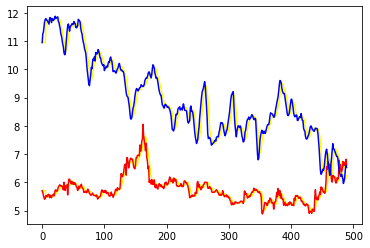

In [12]:
df_predict = result
length_avg = 5
df_avg = np.zeros(len(df_predict))
for i in range(length_avg, len(df_predict)):
    df_avg[i] = sum(df_predict[i-length_avg:i]) / length_avg

ytest_avg = np.zeros(len(df_predict))
for i in range(length_avg, len(df_predict)):
    ytest_avg[i] = sum(y_test[i-length_avg:i]) / length_avg

for i in range(6):  #把图画的好看点
    df_avg[i]= result[0]
    ytest_avg[i] = y_test[0]

plt.plot(df_avg, 'yellow')
plt.plot(ytest_avg, 'yellow')

plt.plot(y_test, 'r', label = 'origin')
plt.plot(result, 'b', label = 'prediction')
plt.show()


### 由于我们分析的股票在近几年收盘价总体有很大的变动，所以预测结果比实际高一个台阶，但是涨跌幅大概相当，所以在接下来的预测中将采用涨跌幅进行策略。并且经过多次实验发现，模型在140-400天的表现要明显优于其他时间段
### 我们的策略：当预测的涨跌趋势在过去的三天内都比较吻合的情况下，执行买入和卖出操作

在预测区间（130，420）内，大盘从6.27变动到5.21
大盘跌落百分比为-16.87
我们最终仍然赚到了1183255.64020


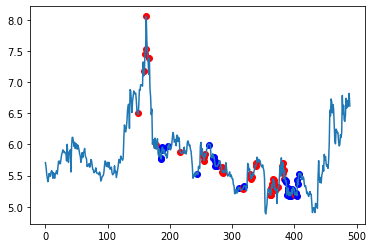

In [13]:
point = np.zeros(490)
for i in range(130, 420):
    point[i] = dsw.calculate(ytest_avg[i-6:i], result[i-6:i+1], df_avg[i-6: i])
plt.plot(range(490), y_test)
for i in range(490):
    if point[i] > 0.00001:
        plt.scatter(i, y_test[i], c = 'red', marker='o')
    if point[i] < -0.00001:
        plt.scatter(i, y_test[i], c = 'blue', marker='o')

start_cash = 1000000
profit = dsw.operating(point, y_test, start_cash)
percent = (y_test[420]-y_test[130]) / y_test[130] *100
print("在预测区间（130，420）内，大盘从%.2f变动到%.2f" % (y_test[130], y_test[420]))
print("大盘跌落百分比为%.2f" % percent)
print( "我们最终仍然赚到了%.5f" % profit)


### 可以看到图中标记了很多连买连卖的操作，是因为策略设置的是稳定状况下逐渐追加
## 虽然我们分析的股票区间（130，420）下滑很大，但我们仍然赚到了近19w元